In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from evds import evdsAPI
from datetime import date

In [3]:
evds=evdsAPI('dsIC3fiGlu')


In [4]:
usd=evds.get_data(["TP.DK.USD.S.YTL"],startdate="01-02-2006",enddate=date.today().strftime("%d-%m-%Y"),frequency=2)
usd.dropna(inplace=True)
usd

,Tarih,TP_DK_USD_S_YTL
0,01-02-2006,1.3263
1,02-02-2006,1.3241
2,03-02-2006,1.3277
3,06-02-2006,1.3257
4,07-02-2006,1.3296
...,...,...
4596,14-09-2023,26.9509
4597,15-09-2023,26.9554
4598,18-09-2023,26.9785
4599,19-09-2023,27.0300


In [5]:
usd['Tarih'] = pd.to_datetime(usd['Tarih'], format='%d-%m-%Y')

# Tarihi indeks olarak ayarla
usd.set_index('Tarih', inplace=True)

# Aylık ortalama değerleri hesapla
usd = usd.resample('M').mean()

# Sonucu görüntüle
usd

,TP_DK_USD_S_YTL
Tarih,
2006-02-28,1.326535
2006-03-31,1.335139
2006-04-30,1.337345
2006-05-31,1.420659
2006-06-30,1.600536
...,...
2023-05-31,19.719514
2023-06-30,23.106042
2023-07-31,26.470338


In [6]:
enf=evds.get_data(["TP.FG.J0"],startdate="01-02-2006",enddate=date.today().strftime("%d-%m-%Y"))
enf

,Tarih,TP_FG_J0
0,2006-2,123.84
1,2006-3,124.18
2,2006-4,125.84
3,2006-5,128.20
4,2006-6,128.63
...,...,...
206,2023-4,1300.04
207,2023-5,1300.60
208,2023-6,1351.59
209,2023-7,1479.84


In [7]:
inflation=enf
inflation=pd.DataFrame(inflation)
inflation.columns=["Tarih","TÜFE"]


In [8]:

inflationagt=pd.DataFrame.from_dict({'Tarih':"2023-9",'TÜFE': [1717]})
inflation=pd.concat([inflation,inflationagt],axis=0)
inflation

,Tarih,TÜFE
0,2006-2,123.84
1,2006-3,124.18
2,2006-4,125.84
3,2006-5,128.20
4,2006-6,128.63
...,...,...
207,2023-5,1300.60
208,2023-6,1351.59
209,2023-7,1479.84
210,2023-8,1614.31


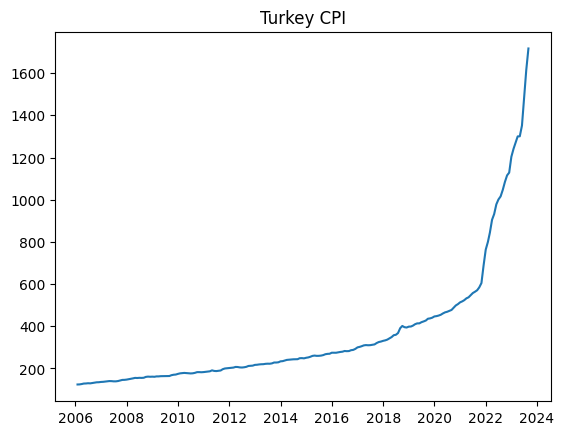

In [9]:
dates=pd.date_range('2006-02-01','2023-10-01' , freq='1M')-pd.offsets.MonthBegin(1)
df=pd.DataFrame()

df["CPI"]=inflation["TÜFE"]
df=df.set_index(dates)
plt.figure()
plt.title("Turkey CPI")

plt.plot(df)
plt.show()


In [10]:
df6=pd.DataFrame()
df6["USD/TL"]=usd["TP_DK_USD_S_YTL"]

df6["USD/TL"]=df6["USD/TL"].astype(float)
df6

,USD/TL
Tarih,
2006-02-28,1.326535
2006-03-31,1.335139
2006-04-30,1.337345
2006-05-31,1.420659
2006-06-30,1.600536
...,...
2023-05-31,19.719514
2023-06-30,23.106042
2023-07-31,26.470338


In [11]:
dates= pd.date_range('2006-02-01','2023-10-01' , freq='1M')-pd.offsets.MonthBegin(1)

            
df6=df6.set_index(dates)

df6["Onceki USD/TL"]=df6["USD/TL"].shift(1)
df6.iloc[0,1]=1.32
df6

,USD/TL,Onceki USD/TL
2006-02-01,1.326535,1.320000
2006-03-01,1.335139,1.326535
2006-04-01,1.337345,1.335139
2006-05-01,1.420659,1.337345
2006-06-01,1.600536,1.420659
...,...,...
2023-05-01,19.719514,19.337032
2023-06-01,23.106042,19.719514
2023-07-01,26.470338,23.106042
2023-08-01,26.999127,26.470338


In [12]:
money=evds.get_data(["TP.PR.ARZ13"],startdate="01-02-2006",enddate=date.today().strftime("%d-%m-%Y"),frequency=5)
money

,Tarih,TP_PR_ARZ13
0,2006-2,2.423895e+08
1,2006-3,2.494857e+08
2,2006-4,2.521919e+08
3,2006-5,2.751947e+08
4,2006-6,2.791388e+08
...,...,...
207,2023-5,9.409317e+09
208,2023-6,1.083453e+10
209,2023-7,1.147848e+10
210,2023-8,1.202532e+10


In [13]:
#Cleaning the data

money_supply=pd.DataFrame(money)
money_supply.columns=["Tarih","Para Arzi"]
money_supply["Para Arzi"]=money_supply["Para Arzi"].astype(float)
money_supply


,Tarih,Para Arzi
0,2006-2,2.423895e+08
1,2006-3,2.494857e+08
2,2006-4,2.521919e+08
3,2006-5,2.751947e+08
4,2006-6,2.791388e+08
...,...,...
207,2023-5,9.409317e+09
208,2023-6,1.083453e+10
209,2023-7,1.147848e+10
210,2023-8,1.202532e+10


In [14]:
money_supply=money_supply.set_index(dates)
money_supply["Para Arzi"]=money_supply["Para Arzi"]/1e+08
money_supply
dfn=pd.DataFrame(money_supply)
del dfn["Tarih"]
dfn["Para Arzi Onceki"]=dfn["Para Arzi"].shift(1)
dfn.iloc[0,1]=2.39
dfn


,Para Arzi,Para Arzi Onceki
2006-02-01,2.423895,2.390000
2006-03-01,2.494857,2.423895
2006-04-01,2.521919,2.494857
2006-05-01,2.751947,2.521919
2006-06-01,2.791388,2.751947
...,...,...
2023-05-01,94.093167,95.059993
2023-06-01,108.345324,94.093167
2023-07-01,114.784753,108.345324
2023-08-01,120.253199,114.784753


In [15]:
brent=evds.get_data(["TP.BRENTPETROL.EUBP"],startdate="01-02-2006",enddate=date.today().strftime("%d-%m-%Y"),frequency=1)
brent

,Tarih,TP_BRENTPETROL_EUBP
0,01-02-2006,65.64
1,02-02-2006,63.49
2,03-02-2006,62.54
3,06-02-2006,63.32
4,07-02-2006,61.64
...,...,...
4589,05-09-2023,91.25
4590,06-09-2023,91.79
4591,07-09-2023,91.16
4592,08-09-2023,91.85


In [16]:
brent['Tarih'] = pd.to_datetime(brent['Tarih'], format='%d-%m-%Y')

# Tarihi indeks olarak ayarla
brent.set_index('Tarih', inplace=True)

# Aylık ortalama değerleri hesapla
brent = brent.resample('M').mean()

# Sonucu görüntüle
brent

,TP_BRENTPETROL_EUBP
Tarih,
2006-02-28,60.210000
2006-03-31,62.064783
2006-04-30,70.260000
2006-05-31,69.776957
2006-06-30,68.555909
...,...
2023-05-31,75.466000
2023-06-30,74.839091
2023-07-31,80.108095


In [17]:

brent1=pd.DataFrame(brent)
brent1.columns=["Brent"]
brent1.loc["2023-09-30","Brent"]=95
brent1


,Brent
Tarih,
2006-02-28,60.210000
2006-03-31,62.064783
2006-04-30,70.260000
2006-05-31,69.776957
2006-06-30,68.555909
...,...
2023-05-31,75.466000
2023-06-30,74.839091
2023-07-31,80.108095


In [18]:
df14=pd.DataFrame()
dates=pd.date_range('2006-02-01','2023-10-01' , freq='1M')-pd.offsets.MonthBegin(1)

df14["Brent"]=brent1["Brent"]
df14["TIME"]=dates
df14['TIME'].replace(regex=True,inplace=True, to_replace='M',value='')
df14['TIME'] =  pd.to_datetime(df14['TIME'], format='%Y%m', errors='ignore', infer_datetime_format=True)
df14 = df14.set_index(['TIME'])
df14

C:\Users\Bora\AppData\Local\Temp\ipykernel_16732\3566834801.py:7: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df14['TIME'] =  pd.to_datetime(df14['TIME'], format='%Y%m', errors='ignore', infer_datetime_format=True)


,Brent
TIME,
2006-02-01,60.210000
2006-03-01,62.064783
2006-04-01,70.260000
2006-05-01,69.776957
2006-06-01,68.555909
...,...
2023-05-01,75.466000
2023-06-01,74.839091
2023-07-01,80.108095


In [19]:
kredi=evds.get_data(["TP.KREDI.L001"],startdate="01-02-2006",enddate=date.today().strftime("%d-%m-%Y"),frequency=5)
kredi

,Tarih,TP_KREDI_L001
0,2006-2,1.381847e+08
1,2006-3,1.481222e+08
2,2006-4,1.527510e+08
3,2006-5,1.664881e+08
4,2006-6,1.740395e+08
...,...,...
207,2023-5,8.804344e+09
208,2023-6,9.564604e+09
209,2023-7,9.846895e+09
210,2023-8,9.923806e+09


In [20]:
dates=pd.date_range('2006-02-01','2023-10-01' , freq='1M')-pd.offsets.MonthBegin(1)
kredi=pd.DataFrame(kredi)
kredi.columns=["Tarih","Kredi"]
kredi["Kredi"]=kredi["Kredi"]/1e+08
kredi

,Tarih,Kredi
0,2006-2,1.381847
1,2006-3,1.481222
2,2006-4,1.527510
3,2006-5,1.664881
4,2006-6,1.740395
...,...,...
207,2023-5,88.043441
208,2023-6,95.646045
209,2023-7,98.468952
210,2023-8,99.238055


In [21]:
df3=pd.DataFrame()
df3["Kredi"]=kredi["Kredi"]
df3["TIME"]=dates
df3['TIME'].replace(regex=True,inplace=True, to_replace='M',value='')
df3['TIME'] =  pd.to_datetime(df3['TIME'], format='%Y%m', errors='ignore', infer_datetime_format=True)
df3 = df3.set_index(['TIME'])
df3

C:\Users\Bora\AppData\Local\Temp\ipykernel_16732\2513009782.py:5: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df3['TIME'] =  pd.to_datetime(df3['TIME'], format='%Y%m', errors='ignore', infer_datetime_format=True)


,Kredi
TIME,
2006-02-01,1.381847
2006-03-01,1.481222
2006-04-01,1.527510
2006-05-01,1.664881
2006-06-01,1.740395
...,...
2023-05-01,88.043441
2023-06-01,95.646045
2023-07-01,98.468952


In [22]:
pfaiz=evds.get_data(["TP.APIFON4"],startdate="01-02-2006",enddate=date.today().strftime("%d-%m-%Y"),frequency=5)
pfaiz.iloc[:59,1]=5
pfaiz.iloc[210,1]=25
pfaiz.iloc[211,1]=35
pfaiz


,Tarih,TP_APIFON4
0,2006-2,5.00
1,2006-3,5.00
2,2006-4,5.00
3,2006-5,5.00
4,2006-6,5.00
...,...,...
207,2023-5,9.09
208,2023-6,12.84
209,2023-7,17.50
210,2023-8,25.00


In [23]:
dates=pd.date_range('2006-02-01','2023-10-01' , freq='1M')-pd.offsets.MonthBegin(1)
pfaiz=pd.DataFrame(pfaiz)
pfaiz.columns=["Tarih","Politika Faizi"]
pfaiz["TIME"]=dates
pfaiz['TIME'].replace(regex=True,inplace=True, to_replace='M',value='')
pfaiz['TIME'] =  pd.to_datetime(pfaiz['TIME'], format='%Y%m', errors='ignore', infer_datetime_format=True)
pfaiz = pfaiz.set_index(['TIME'])
del pfaiz["Tarih"]
pfaiz

C:\Users\Bora\AppData\Local\Temp\ipykernel_16732\3293406371.py:6: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  pfaiz['TIME'] =  pd.to_datetime(pfaiz['TIME'], format='%Y%m', errors='ignore', infer_datetime_format=True)


,Politika Faizi
TIME,
2006-02-01,5.00
2006-03-01,5.00
2006-04-01,5.00
2006-05-01,5.00
2006-06-01,5.00
...,...
2023-05-01,9.09
2023-06-01,12.84
2023-07-01,17.50


In [89]:
X=pd.concat([df6["Onceki USD/TL"],dfn["Para Arzi Onceki"],df14.Brent,df3.Kredi,pfaiz["Politika Faizi"]],axis=1)



In [91]:
y=pd.DataFrame(df["CPI"])
y["CPI"]=y["CPI"].astype(float)
y


,CPI
2006-02-01,123.84
2006-03-01,124.18
2006-04-01,125.84
2006-05-01,128.20
2006-06-01,128.63
...,...
2023-05-01,1300.60
2023-06-01,1351.59
2023-07-01,1479.84
2023-08-01,1614.31


In [92]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [93]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
import pandas as pd
import statsmodels.api as sm

# Verileri yükleyin ve ön işleme yapın

# Modeli eğitin

# Özellikleri sabit terim ekleyerek modeli yeniden eğitin
X_train_with_const = sm.add_constant(X_train)

# OLS (En Küçük Karelerle) modelini oluşturalım ve eğitelim
model_ols = sm.OLS(y_train, X_train_with_const)
results = model_ols.fit()

# Modelin özetini görüntüleyin
print(results.summary())



                            OLS Regression Results                            
Dep. Variable:                    CPI   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     9815.
Date:                Wed, 20 Sep 2023   Prob (F-statistic):          2.17e-178
Time:                        00:31:46   Log-Likelihood:                -618.03
No. Observations:                 148   AIC:                             1248.
Df Residuals:                     142   BIC:                             1266.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               84.1417      5.383  

In [94]:
results.params

const               84.141716
Onceki USD/TL        4.321105
Para Arzi Onceki    10.958398
Brent                0.212874
Kredi                1.244158
Politika Faizi       0.697440
dtype: float64

In [95]:
import statsmodels.api as sm
mod = sm.tsa.statespace.SARIMAX(df14.astype(float),
                                order=(0,1,0),
                                seasonal_order=(2, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

c:\Users\Bora\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Bora\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [96]:
pred = results.get_prediction(start=pd.to_datetime('2016-10-01'), dynamic=False)
pred_ci = pred.conf_int()

In [97]:
pred_ci['Predicted'] = (pred_ci["lower Brent"] + pred_ci["upper Brent"])/2
pred_ci['Observed'] = df14["Brent"]
pred_ci['Diff, %%'] = ((pred_ci['Predicted'] / pred_ci['Observed'])-1) * 100
pred_ci.tail(10)

,lower Brent,upper Brent,Predicted,Observed,"Diff, %%"
2022-12-01,76.737210,106.966052,91.851631,80.996667,13.401742
2023-01-01,70.280647,100.509489,85.395068,82.515909,3.489217
2023-02-01,69.659806,99.888648,84.774227,82.585000,2.650877
2023-03-01,66.202583,96.431425,81.317004,78.434348,3.675247
2023-04-01,52.806233,83.035075,67.920654,84.739474,-19.847680
2023-05-01,78.079867,108.308709,93.194288,75.466000,23.491755
2023-06-01,69.483130,99.711971,84.597551,74.839091,13.039255
2023-07-01,57.168938,87.397780,72.283359,80.108095,-9.767722
2023-08-01,60.263229,90.492071,75.377650,86.147727,-12.501870
2023-09-01,66.073412,96.302254,81.187833,95.000000,-14.539123


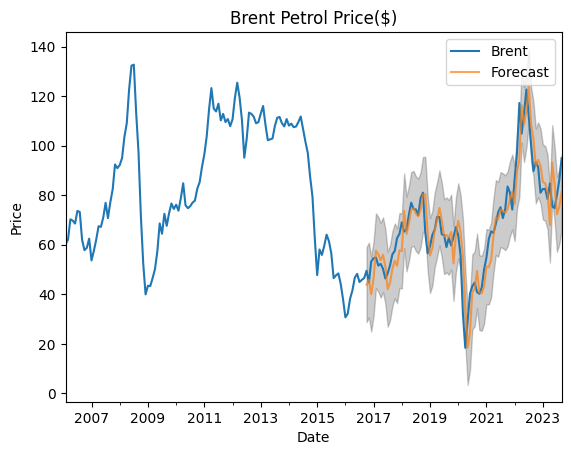

In [98]:
ax = df14['2003':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='Forecast', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

plt.xlabel('Date')
plt.ylabel('Price')
plt.title("Brent Petrol Price($)")
plt.legend()
plt.show()

In [109]:
# Get forecast in future
pred_uc = results.get_forecast(steps=30)

# Get confidence intervals of forecasts
pred_ci = pred_uc.conf_int()

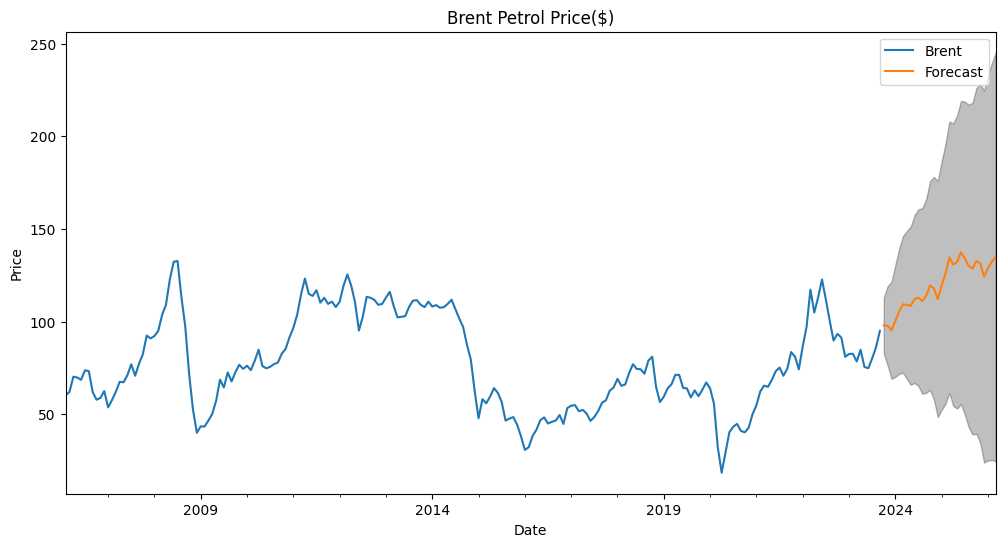

In [100]:
ax = df14.plot(label='observed', figsize=(12, 6))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
plt.xlabel('Date')
plt.ylabel('Price')
plt.title("Brent Petrol Price($)")

plt.legend()

plt.show()

In [116]:
brenttahmin=pd.DataFrame
pred_ci['Mean'] = (pred_ci["lower Brent"] + pred_ci["upper Brent"])/2
brenttahmin=pred_ci["Mean"]
brenttahmin=pd.DataFrame(brenttahmin)
brenttahmin.columns=["Brent"]
brenttahmin1=pd.DataFrame({"Brent":[95]})
brenttahmin1["Tarih"]="2023-09-01"
brenttahmin1=brenttahmin1.set_index("Tarih") 
brenttahmin=pd.concat([brenttahmin1,brenttahmin],axis=0)
brenttahmin



,Brent
2023-09-01,95.000000
2023-10-01 00:00:00,97.922694
2023-11-01 00:00:00,97.703484
2023-12-01 00:00:00,95.278769
2024-01-01 00:00:00,100.312247
2024-02-01 00:00:00,105.564150
2024-03-01 00:00:00,109.306991
2024-04-01 00:00:00,108.986931
2024-05-01 00:00:00,108.585719
2024-06-01 00:00:00,112.198924


In [117]:
import statsmodels.api as sm
mod = sm.tsa.statespace.SARIMAX(dfn["Para Arzi Onceki"].astype(float),
                                order=(1,1,1),
                                seasonal_order=(0,1,1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

c:\Users\Bora\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Bora\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [118]:
pred = results.get_prediction(start=pd.to_datetime('2016-10-01'), dynamic=False)
pred_ci = pred.conf_int()

In [119]:
pred_ci['Predicted'] = (pred_ci["lower Para Arzi Onceki"] + pred_ci["upper Para Arzi Onceki"])/2
pred_ci['Observed'] = dfn["Para Arzi Onceki"]
pred_ci['Diff, %%'] = ((pred_ci['Predicted'] / pred_ci['Observed'])-1) * 100
pred_ci.tail(10)

,lower Para Arzi Onceki,upper Para Arzi Onceki,Predicted,Observed,"Diff, %%"
2022-12-01,79.788146,83.861026,81.824586,79.312824,3.166906
2023-01-01,80.897839,84.970553,82.934196,82.127970,0.981670
2023-02-01,83.538939,87.611491,85.575215,84.330974,1.475426
2023-03-01,85.913395,89.985947,87.949671,86.852197,1.263612
2023-04-01,89.279521,93.351911,91.315716,90.592762,0.798027
2023-05-01,92.887964,96.960194,94.924079,95.059993,-0.142976
2023-06-01,97.777117,101.849190,99.813153,94.093167,6.079067
2023-07-01,96.512535,100.584454,98.548495,108.345324,-9.042226
2023-08-01,111.514846,115.586613,113.550730,114.784753,-1.075076
2023-09-01,118.297273,122.368892,120.333082,120.253199,0.066429


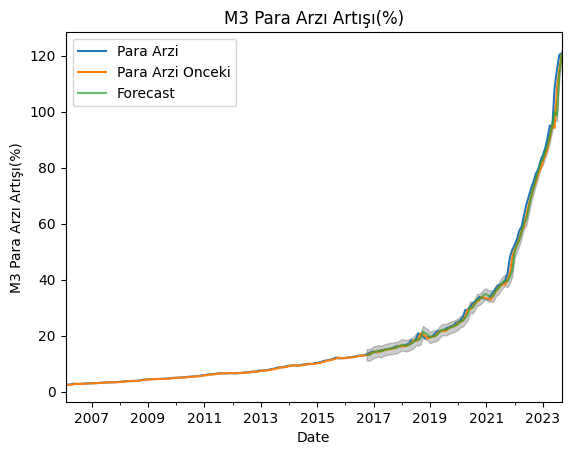

In [39]:
ax = dfn['2003':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='Forecast', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

plt.xlabel('Date')
plt.ylabel('M3 Para Arzı Artışı(%)')
plt.title("M3 Para Arzı Artışı(%)")
plt.legend()
plt.show()

In [120]:
# Get forecast in future
pred_uc = results.get_forecast(steps=30)

# Get confidence intervals of forecasts
pred_ci = pred_uc.conf_int()

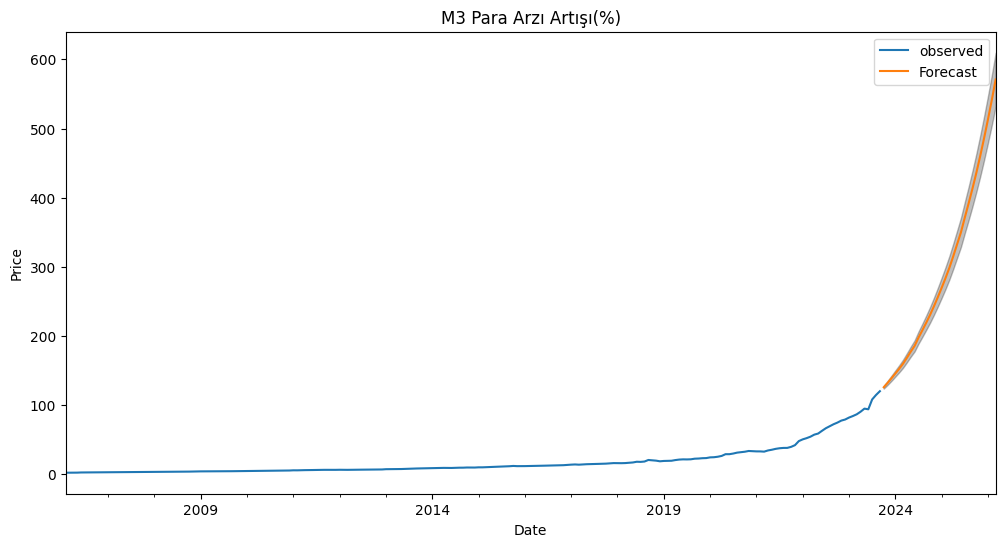

In [41]:
ax = dfn["Para Arzi Onceki"].plot(label='observed', figsize=(12, 6))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
plt.xlabel('Date')
plt.ylabel('Price')
plt.title("M3 Para Arzı Artışı(%)")

plt.legend()

plt.show()

In [122]:
import random
import numpy as np
pred_ci['Mean'] = (pred_ci["lower Para Arzi Onceki"] + pred_ci["upper Para Arzi Onceki"])/2
paraarzitahmin=pred_ci["Mean"]
paraarzitahmin=pd.DataFrame(paraarzitahmin)
paraarzitahmin.columns=["Para Arzi Tahmin"]
paraarzitahmin1=pd.DataFrame({"Para Arzi Tahmin":[120.8]})
paraarzitahmin1["Tarih"]="2023-09-01"
paraarzitahmin1=paraarzitahmin1.set_index("Tarih") 
paraarzitahmin1=pd.concat([paraarzitahmin1,paraarzitahmin],axis=0)
paraarzitahmin1







,Para Arzi Tahmin
2023-09-01,120.800000
2023-10-01 00:00:00,125.963854
2023-11-01 00:00:00,132.260751
2023-12-01 00:00:00,138.929116
2024-01-01 00:00:00,145.810407
2024-02-01 00:00:00,152.670197
2024-03-01 00:00:00,160.011938
2024-04-01 00:00:00,168.564053
2024-05-01 00:00:00,177.445761
2024-06-01 00:00:00,185.802916


In [127]:
y=float(input('Para Arzi Aylık En Fazla % Kaç Artacağını Girin: '))
def paraarziassumption(y):
   drop_percentage = random.uniform(1+(y/300), 1+(y/100))
   
   paraarzitahmin1["Para Arzi Assumption 2"]=paraarzitahmin1["Para Arzi Tahmin"]
   
   for i in range(0, len(paraarzitahmin)-1):
   
      paraarzitahmin1["Para Arzi Assumption 2"][i+1]=paraarzitahmin1["Para Arzi Assumption 2"][i]*drop_percentage
   return paraarzitahmin1
      
paraarziassumption(y)


C:\Users\Bora\AppData\Local\Temp\ipykernel_16732\766888175.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  paraarzitahmin1["Para Arzi Assumption 2"][i+1]=paraarzitahmin1["Para Arzi Assumption 2"][i]*drop_percentage
C:\Users\Bora\AppData\Local\Temp\ipykernel_16732\766888175.py:9: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  paraarzitahmin1["Para Arzi Assumption 2"][i+1]=paraarzitahmin1["Para Arzi Assumption 2"][i]*drop_percentage
C:\Users\Bora\AppData\Local\Temp\ipykernel_16732\766888175.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will a

,Para Arzi Tahmin,Para Arzi Assumption 2
2023-09-01,120.800000,120.800000
2023-10-01 00:00:00,125.963854,125.219216
2023-11-01 00:00:00,132.260751,129.800100
2023-12-01 00:00:00,138.929116,134.548567
2024-01-01 00:00:00,145.810407,139.470746
2024-02-01 00:00:00,152.670197,144.572992
2024-03-01 00:00:00,160.011938,149.861894
2024-04-01 00:00:00,168.564053,155.344279
2024-05-01 00:00:00,177.445761,161.027226
2024-06-01 00:00:00,185.802916,166.918072


In [128]:
import statsmodels.api as sm
mod = sm.tsa.statespace.SARIMAX(df6["USD/TL"].astype(float),
                                order=(0,1,1),
                                seasonal_order=(1,1,1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

c:\Users\Bora\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Bora\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [129]:
pred = results.get_prediction(start=pd.to_datetime('2021-10-01'), dynamic=False)
pred_ci = pred.conf_int()

In [130]:
pred_ci['Predicted'] = (pred_ci["lower USD/TL"] + pred_ci["upper USD/TL"])/2
pred_ci['Observed'] = df6["USD/TL"]
pred_ci['Diff, %%'] = ((pred_ci['Predicted'] / pred_ci['Observed'])-1) * 100
pred_ci.tail(10)

,lower USD/TL,upper USD/TL,Predicted,Observed,"Diff, %%"
2022-12-01,18.098433,19.610270,18.854352,18.670545,0.984471
2023-01-01,17.572184,19.084021,18.328103,18.791373,-2.465333
2023-02-01,18.161412,19.673249,18.917330,18.857210,0.318819
2023-03-01,18.676149,20.187986,19.432067,19.003478,2.255319
2023-04-01,18.389149,19.900986,19.145067,19.337032,-0.992728
2023-05-01,19.064049,20.575885,19.819967,19.719514,0.509408
2023-06-01,19.355496,20.867333,20.111414,23.106042,-12.960367
2023-07-01,24.483460,25.995297,25.239379,26.470338,-4.650335
2023-08-01,26.623418,28.135254,27.379336,26.999127,1.408226
2023-09-01,26.097922,27.609759,26.853840,26.879564,-0.095701


In [131]:
# Get forecast in future
pred_uc = results.get_forecast(steps=30)

# Get confidence intervals of forecasts
pred_ci = pred_uc.conf_int()

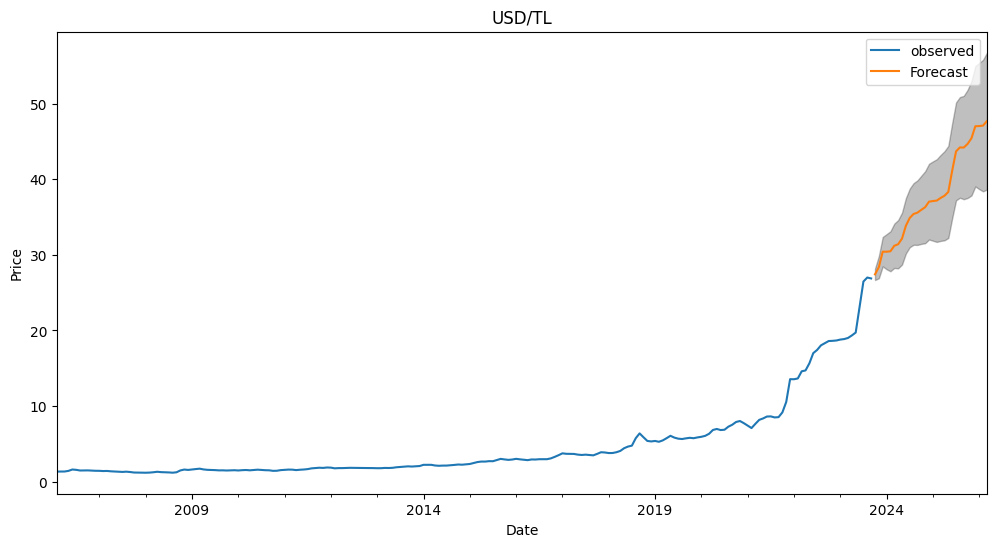

In [48]:
ax = df6["USD/TL"].plot(label='observed', figsize=(12, 6))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
plt.xlabel('Date')
plt.ylabel('Price')
plt.title("USD/TL")

plt.legend()

plt.show()

In [132]:
pred_ci['Mean'] = (pred_ci["lower USD/TL"] + pred_ci["upper USD/TL"])/2
usdtahmin=pred_ci["Mean"]
usdtahmin=pd.DataFrame(usdtahmin)
usdtahmin.columns=["USD Tahmin"]
usdtahmin1=pd.DataFrame({"USD Tahmin":[27.04]})
usdtahmin1["Tarih"]="2023-09-01"
usdtahmin1=usdtahmin1.set_index("Tarih") 
usdtahmin1=pd.concat([usdtahmin1,usdtahmin],axis=0)
usdtahmin1








,USD Tahmin
2023-09-01,27.040000
2023-10-01 00:00:00,27.419926
2023-11-01 00:00:00,28.380159
2023-12-01 00:00:00,30.420191
2024-01-01 00:00:00,30.414500
2024-02-01 00:00:00,30.473109
2024-03-01 00:00:00,31.200129
2024-04-01 00:00:00,31.404707
2024-05-01 00:00:00,32.149754
2024-06-01 00:00:00,33.841728


In [133]:
import random
x=float(input('Dolar/TL Aylık En Fazla % Kaç Artacağını Girin:   '))
def usdassumption(x):
    
  drop_percentage = random.uniform(1+(x/200), 1+(x/100))
  usdtahmin1["USD Tahmin Assumption 2"]=usdtahmin1["USD Tahmin"]
  for i in range(0, len(usdtahmin1)-3):
   
    usdtahmin1["USD Tahmin Assumption 2"][i+3]=usdtahmin1["USD Tahmin Assumption 2"][i+2]*drop_percentage

  return usdtahmin1

usdassumption(x)
  



C:\Users\Bora\AppData\Local\Temp\ipykernel_16732\2424062803.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  usdtahmin1["USD Tahmin Assumption 2"][i+3]=usdtahmin1["USD Tahmin Assumption 2"][i+2]*drop_percentage
C:\Users\Bora\AppData\Local\Temp\ipykernel_16732\2424062803.py:9: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  usdtahmin1["USD Tahmin Assumption 2"][i+3]=usdtahmin1["USD Tahmin Assumption 2"][i+2]*drop_percentage
C:\Users\Bora\AppData\Local\Temp\ipykernel_16732\2424062803.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be 

,USD Tahmin,USD Tahmin Assumption 2
2023-09-01,27.040000,27.040000
2023-10-01 00:00:00,27.419926,27.419926
2023-11-01 00:00:00,28.380159,28.380159
2023-12-01 00:00:00,30.420191,29.357236
2024-01-01 00:00:00,30.414500,30.367953
2024-02-01 00:00:00,30.473109,31.413467
2024-03-01 00:00:00,31.200129,32.494976
2024-04-01 00:00:00,31.404707,33.613719
2024-05-01 00:00:00,32.149754,34.770979
2024-06-01 00:00:00,33.841728,35.968081


In [134]:
import statsmodels.api as sm
mod = sm.tsa.statespace.SARIMAX(df3.astype(float),
                                order=(3,1,0),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

c:\Users\Bora\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Bora\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [135]:
pred = results.get_prediction(start=pd.to_datetime('2021-10-01'), dynamic=False)
pred_ci = pred.conf_int()

In [136]:
pred_ci['Predicted'] = (pred_ci["lower Kredi"] + pred_ci["upper Kredi"])/2
pred_ci['Observed'] = df3["Kredi"]
pred_ci['Diff, %%'] = ((pred_ci['Predicted'] / pred_ci['Observed'])-1) * 100
pred_ci.tail(10)

,lower Kredi,upper Kredi,Predicted,Observed,"Diff, %%"
2022-12-01,69.467707,72.365714,70.916711,72.851339,-2.655584
2023-01-01,72.580977,75.478983,74.029980,75.079809,-1.398285
2023-02-01,75.577323,78.475329,77.026326,77.112692,-0.112000
2023-03-01,78.682452,81.580458,80.131455,82.109915,-2.409527
2023-04-01,83.730472,86.628478,85.179475,85.721139,-0.631890
2023-05-01,87.379865,90.277871,88.828868,88.043441,0.892090
2023-06-01,89.472799,92.370805,90.921802,95.646045,-4.939297
2023-07-01,97.428110,100.326116,98.877113,98.468952,0.414507
2023-08-01,98.860137,101.758143,100.309140,99.238055,1.079309
2023-09-01,101.349481,104.247487,102.798484,100.328877,2.461512


In [137]:
# Get forecast in future
pred_uc = results.get_forecast(steps=30)

# Get confidence intervals of forecasts
pred_ci = pred_uc.conf_int()

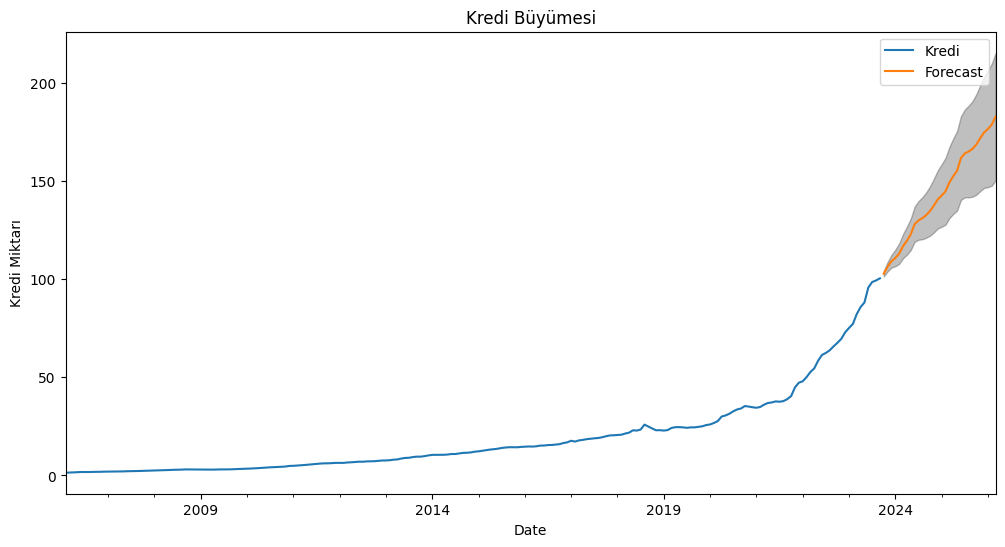

In [55]:
ax = df3.plot(label='observed', figsize=(12, 6))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
plt.xlabel('Date')
plt.ylabel('Kredi Miktarı')
plt.title("Kredi Büyümesi")

plt.legend()

plt.show()

In [139]:
import random
pred_ci['Mean'] = (pred_ci["lower Kredi"] + pred_ci["upper Kredi"])/2
kreditahmin=pred_ci["Mean"]
kreditahmin=pd.DataFrame(kreditahmin)
kreditahmin.columns=["Kredi Tahmin"]
kreditahmin1=pd.DataFrame({"Kredi Tahmin":[100.32]})
kreditahmin1["Tarih"]="2023-09-01"
kreditahmin1=kreditahmin1.set_index("Tarih") 
kreditahmin1=pd.concat([kreditahmin1,kreditahmin],axis=0)
kreditahmin1




,Kredi Tahmin
2023-09-01,100.320000
2023-10-01 00:00:00,102.722800
2023-11-01 00:00:00,106.270261
2023-12-01 00:00:00,109.036104
2024-01-01 00:00:00,110.703522
2024-02-01 00:00:00,112.939907
2024-03-01 00:00:00,116.716541
2024-04-01 00:00:00,119.476552
2024-05-01 00:00:00,122.744841
2024-06-01 00:00:00,127.889501


In [140]:
z=float(input('Kredi Hacmi Aylık En Fazla % Kaç Artacağını Girin: '))
def krediassumption(z):

   drop_percentage = random.uniform(0.97, 1+(z/100))
   drop_percentage1=random.uniform(0.005, 0.01)
   kreditahmin1["Kredi Tahmin Assumption 2"]=kreditahmin1["Kredi Tahmin"]
   for i in range(0, len(kreditahmin)-1):
   
      kreditahmin1["Kredi Tahmin Assumption 2"][i+1]=kreditahmin1["Kredi Tahmin Assumption 2"][i]*drop_percentage
   return kreditahmin1
krediassumption(z)
   

C:\Users\Bora\AppData\Local\Temp\ipykernel_16732\3035053798.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  kreditahmin1["Kredi Tahmin Assumption 2"][i+1]=kreditahmin1["Kredi Tahmin Assumption 2"][i]*drop_percentage
C:\Users\Bora\AppData\Local\Temp\ipykernel_16732\3035053798.py:9: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  kreditahmin1["Kredi Tahmin Assumption 2"][i+1]=kreditahmin1["Kredi Tahmin Assumption 2"][i]*drop_percentage
C:\Users\Bora\AppData\Local\Temp\ipykernel_16732\3035053798.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys wil

,Kredi Tahmin,Kredi Tahmin Assumption 2
2023-09-01,100.320000,100.320000
2023-10-01 00:00:00,102.722800,97.830584
2023-11-01 00:00:00,106.270261,95.402942
2023-12-01 00:00:00,109.036104,93.035542
2024-01-01 00:00:00,110.703522,90.726888
2024-02-01 00:00:00,112.939907,88.475523
2024-03-01 00:00:00,116.716541,86.280024
2024-04-01 00:00:00,119.476552,84.139007
2024-05-01 00:00:00,122.744841,82.051118
2024-06-01 00:00:00,127.889501,80.015040


In [58]:
from pmdarima.arima import auto_arima

results = auto_arima(pfaiz, start_p=1, start_q=1, max_p=3, max_q=3, m=12, start_P=0, seasonal=True, d=1, D=1, trace=True, error_action='ignore',
suppress_warnings=True, stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=inf, Time=0.74 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=797.401, Time=0.04 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=676.198, Time=0.10 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=0.40 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=723.612, Time=0.04 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=645.402, Time=0.27 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=1.50 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=0.41 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=704.931, Time=0.21 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=636.282, Time=0.42 sec
 ARIMA(2,1,0)(1,1,0)[12]             : AIC=668.961, Time=0.15 sec
 ARIMA(2,1,0)(2,1,1)[12]             : AIC=610.633, Time=1.88 sec
 ARIMA(2,1,0)(1,1,1)[12]             : AIC=inf, Time=0.58 sec
 ARIMA(2,1,0)(2,1,2)[12]             : AIC=inf, Time=2.29 sec
 ARIMA(2,1,0)(1,1,2)[12]             : AIC=inf, Time=2.00

In [141]:
import statsmodels.api as sm
mod = sm.tsa.statespace.SARIMAX(pfaiz.astype(float),
                                order=(2,1,0),
                                seasonal_order=(2, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

c:\Users\Bora\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Bora\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [143]:
pred = results.get_prediction(start=pd.to_datetime('2021-10-01'), dynamic=False)
pred_ci = pred.conf_int()

In [144]:
pred_ci['Predicted'] = (pred_ci["lower Politika Faizi"] + pred_ci["upper Politika Faizi"])/2
pred_ci['Observed'] = pfaiz["Politika Faizi"]
pred_ci['Diff, %%'] = ((pred_ci['Predicted'] / pred_ci['Observed'])-1) * 100
pred_ci.tail(10)

,lower Politika Faizi,upper Politika Faizi,Predicted,Observed,"Diff, %%"
2022-12-01,5.741412,10.048731,7.895071,9.04,-12.665141
2023-01-01,6.753218,11.060535,8.906877,9.00,-1.034705
2023-02-01,6.607632,10.914935,8.761283,8.76,0.014651
2023-03-01,6.560569,10.867724,8.714146,8.56,1.800773
2023-04-01,5.745617,10.051345,7.898481,8.70,-9.212865
2023-05-01,7.105341,11.410890,9.258115,9.09,1.849454
2023-06-01,7.127089,11.432638,9.279864,12.84,-27.726919
2023-07-01,12.147039,16.452587,14.299813,17.50,-18.286785
2023-08-01,20.057470,24.363018,22.210244,25.00,-11.159024
2023-09-01,28.687009,32.992557,30.839783,35.00,-11.886334


In [145]:
# Get forecast in future
pred_uc = results.get_forecast(steps=30)

# Get confidence intervals of forecasts
pred_ci = pred_uc.conf_int()

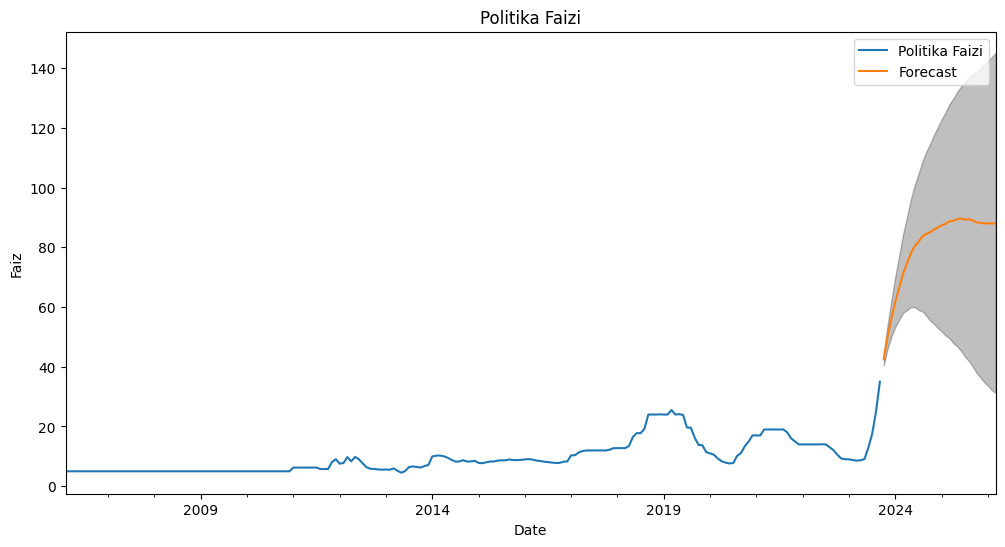

In [63]:
ax = pfaiz.plot(label='observed', figsize=(12, 6))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
plt.xlabel('Date')
plt.ylabel('Faiz')
plt.title("Politika Faizi")

plt.legend()

plt.show()

In [146]:
pred_ci['Mean'] = (pred_ci["lower Politika Faizi"] + pred_ci["upper Politika Faizi"])/2
faiztahmin=pred_ci["Mean"]
faiztahmin=pd.DataFrame(faiztahmin)
faiztahmin.columns=["Politika Faizi"]
faiztahmin["Politika Faizi"]=faiztahmin["Politika Faizi"].astype(int)
faiztahmin1=pd.DataFrame({"Politika Faizi":[35]})
faiztahmin1["Tarih"]="2023-09-01"
faiztahmin1=faiztahmin1.set_index("Tarih") 
faiztahmin1=pd.concat([faiztahmin1,faiztahmin],axis=0)
faiztahmin1

,Politika Faizi
2023-09-01,35
2023-10-01 00:00:00,42
2023-11-01 00:00:00,50
2023-12-01 00:00:00,56
2024-01-01 00:00:00,61
2024-02-01 00:00:00,66
2024-03-01 00:00:00,71
2024-04-01 00:00:00,74
2024-05-01 00:00:00,77
2024-06-01 00:00:00,80


In [150]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
import pandas as pd
import statsmodels.api as sm

# Verileri yükleyin ve ön işleme yapın

# Modeli eğitin

# Özellikleri sabit terim ekleyerek modeli yeniden eğitin
X_train_with_const = sm.add_constant(X_train)

# OLS (En Küçük Karelerle) modelini oluşturalım ve eğitelim
model_ols = sm.OLS(y_train, X_train_with_const)
results = model_ols.fit()










res2=[]
res3=[]


for i in range(31):
    res2.append(results.params["const"]+results.params["Onceki USD/TL"]*usdtahmin1["USD Tahmin"][i]+results.params["Para Arzi Onceki"]*paraarzitahmin1["Para Arzi Tahmin"][i]+results.params["Kredi"]*kreditahmin1["Kredi Tahmin"][i]+results.params["Brent"]*brenttahmin["Brent"][i]+results.params["Politika Faizi"]*faiztahmin1["Politika Faizi"][i])
    res3.append(results.params["const"]+results.params["Onceki USD/TL"]*usdtahmin1["USD Tahmin Assumption 2"][i]+results.params["Para Arzi Onceki"]*paraarzitahmin1["Para Arzi Assumption 2"][i]+results.params["Kredi"]*kreditahmin1["Kredi Tahmin Assumption 2"][i]+results.params["Brent"]*brenttahmin["Brent"][i]+results.params["Politika Faizi"]*faiztahmin1["Politika Faizi"][i])
   
    



df9=pd.DataFrame()
dates=pd.date_range('2023-09-01','2026-04-01' , freq='1M')-pd.offsets.MonthBegin(1)
df9["Inflation"]=res2
df9["Assumption 2 Inflation"]=res3
df9['TIME']=dates
df9=df9.set_index(dates)
del df9['TIME']
df9

C:\Users\Bora\AppData\Local\Temp\ipykernel_16732\2883317444.py:32: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  res2.append(results.params["const"]+results.params["Onceki USD/TL"]*usdtahmin1["USD Tahmin"][i]+results.params["Para Arzi Onceki"]*paraarzitahmin1["Para Arzi Tahmin"][i]+results.params["Kredi"]*kreditahmin1["Kredi Tahmin"][i]+results.params["Brent"]*brenttahmin["Brent"][i]+results.params["Politika Faizi"]*faiztahmin1["Politika Faizi"][i])
C:\Users\Bora\AppData\Local\Temp\ipykernel_16732\2883317444.py:33: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  res3.append(results.params["const"]+results.params["Oncek

,Inflation,Assumption 2 Inflation
2023-09-01,1694.206358,1694.206358
2023-10-01,1760.929338,1746.682615
2023-11-01,1844.028970,1803.543521
2023-12-01,1933.028393,1860.524223
2024-01-01,2015.044966,1920.517204
2024-02-01,2097.858145,1982.751573
2024-03-01,2190.436095,2046.935189
2024-04-01,2290.495651,2111.207982
2024-05-01,2397.117559,2177.893868
2024-06-01,2505.272046,2247.949181


In [151]:

data=pd.DataFrame()
dates=pd.date_range(start='2006-02-01', periods=212, freq='M')

# Veriyi bir veri çerçevesine yerleştirme


data["Döviz Kuru"]=df6["Onceki USD/TL"]
data["Para Arzı"]=dfn["Para Arzi"]
data["Petrol"]=df14["Brent"]
data["Kredi Hacmi"]=df3["Kredi"]
data["TÜFE"]=df["CPI"]
data.set_index(dates, inplace=True)
data.dropna(inplace=True)
data=data.head(211)
data





,Döviz Kuru,Para Arzı,Petrol,Kredi Hacmi,TÜFE
2006-02-28,1.320000,2.423895,60.210000,1.381847,123.84
2006-03-31,1.326535,2.494857,62.064783,1.481222,124.18
2006-04-30,1.335139,2.521919,70.260000,1.527510,125.84
2006-05-31,1.337345,2.751947,69.776957,1.664881,128.20
2006-06-30,1.420659,2.791388,68.555909,1.740395,128.63
...,...,...,...,...,...
2023-04-30,19.003478,95.059993,84.739474,85.721139,1300.04
2023-05-31,19.337032,94.093167,75.466000,88.043441,1300.60
2023-06-30,19.719514,108.345324,74.839091,95.646045,1351.59
2023-07-31,23.106042,114.784753,80.108095,98.468952,1479.84


In [68]:
import numpy as np
import pandas as pd
import statsmodels.api as sm




# VAR modelini oluşturun
model = sm.tsa.VAR(data)

# Modeli uyarlayın
results = model.fit(maxlags=4)  # İhtiyaca göre maksimum gecikme düzeyini ayarlayabilirsiniz



# Tahminler yapın (örneğin, 12 aylık öngörü)
forecast_horizon = 12
forecast = results.forecast(y=results.endog, steps=forecast_horizon)

forecast=pd.DataFrame(forecast[:,4])
forecast.columns=["TÜFE"]
forecast


,TÜFE
0,1719.842940
1,1839.638658
2,1917.729998
3,1959.437987
4,2019.145913
5,2106.923693
6,2208.486516
7,2351.335828
8,2503.442715
9,2644.485399


In [69]:
dates=pd.date_range('2023-09-01','2024-09-01' , freq='1M')-pd.offsets.MonthBegin(1)
tahmin5=pd.DataFrame(forecast["TÜFE"])
tahmin5=tahmin5.set_index(dates)
tahmin5.columns=["TÜFE"]
tahmin5

,TÜFE
2023-09-01,1719.842940
2023-10-01,1839.638658
2023-11-01,1917.729998
2023-12-01,1959.437987
2024-01-01,2019.145913
2024-02-01,2106.923693
2024-03-01,2208.486516
2024-04-01,2351.335828
2024-05-01,2503.442715
2024-06-01,2644.485399


In [70]:
data["random_walk_component"] = data['Döviz Kuru'].shift(1)
data=data.dropna()
data

,Döviz Kuru,Para Arzı,Petrol,Kredi Hacmi,TÜFE,random_walk_component
2006-03-31,1.326535,2.494857,62.064783,1.481222,124.18,1.320000
2006-04-30,1.335139,2.521919,70.260000,1.527510,125.84,1.326535
2006-05-31,1.337345,2.751947,69.776957,1.664881,128.20,1.335139
2006-06-30,1.420659,2.791388,68.555909,1.740395,128.63,1.337345
2006-07-31,1.600536,2.711670,73.674286,1.731811,129.72,1.420659
...,...,...,...,...,...,...
2023-04-30,19.003478,95.059993,84.739474,85.721139,1300.04,18.857210
2023-05-31,19.337032,94.093167,75.466000,88.043441,1300.60,19.003478
2023-06-30,19.719514,108.345324,74.839091,95.646045,1351.59,19.337032
2023-07-31,23.106042,114.784753,80.108095,98.468952,1479.84,19.719514


In [71]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.tsa.api as tsa



# Parametrelerin zaman içinde değişeceği random walk süreçlerini oluşturun
param_dolar = np.cumsum(np.random.randn(210))  # Dolar parametresi için


# Hata teriminin zaman içinde değişeceği süreci oluşturun (2 lag)
error_term = np.random.randn(210)
for t in range(2, 210):
    error_term[t] += 0.7 * error_term[t - 1] + 0.2 * error_term[t - 2]

# Hata teriminin dağılımı için t-dağılımı kullanın (serbestlik derecesi tahmin ediliyor)
degrees_of_freedom = np.abs(np.random.randn(210)) * 10 + 2  # Rastgele serbestlik derecesi

# Stokastik volatiliteyi oluşturun (varyans da zaman içinde random walk)
volatility = np.exp(np.cumsum(np.random.randn(210)))  # Logaritmik volatiliteyi oluşturun

# Tüm bu oluşturulan süreçleri bir DataFrame'e ekleyin
data['Param_Dolar'] = param_dolar
data['Error_Term'] = error_term
data['Degrees_of_Freedom'] = degrees_of_freedom
data['Volatility'] = volatility

model_data = data
model = tsa.VAR(model_data)

# Modeli uyarlayın (4 lag)
results = model.fit(maxlags=1)

# Tahminleri yapın (örneğin, son 12 aylık öngörü)
forecast_horizon = 12
forecast_input = model_data.iloc[-4:, :].values  # Son 4 gözlemi kullanarak tahmin ediyoruz
forecast = results.forecast(y=forecast_input, steps=forecast_horizon)

forecast=pd.DataFrame(forecast[:,4])
forecast.columns=["TÜFE"]
forecast



C:\Users\Bora\AppData\Local\Temp\ipykernel_16732\3013777412.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Param_Dolar'] = param_dolar
C:\Users\Bora\AppData\Local\Temp\ipykernel_16732\3013777412.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Error_Term'] = error_term
C:\Users\Bora\AppData\Local\Temp\ipykernel_16732\3013777412.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See 

,TÜFE
0,1713.684622
1,1794.886718
2,1862.596552
3,1923.581646
4,1985.253754
5,2053.882654
6,2133.428642
7,2225.222677
8,2328.377888
9,2440.648195


In [72]:
dates=pd.date_range('2023-09-01','2024-09-01' , freq='1M')-pd.offsets.MonthBegin(1)
tahmin6=pd.DataFrame(forecast["TÜFE"])
tahmin6=tahmin6.set_index(dates)
tahmin6.columns=["TÜFE"]
tahmin6

,TÜFE
2023-09-01,1713.684622
2023-10-01,1794.886718
2023-11-01,1862.596552
2023-12-01,1923.581646
2024-01-01,1985.253754
2024-02-01,2053.882654
2024-03-01,2133.428642
2024-04-01,2225.222677
2024-05-01,2328.377888
2024-06-01,2440.648195


In [73]:
import numpy as np
import pandas as pd
import statsmodels.tsa.api as sm


model = sm.VECM(data)
results = model.fit()

# TÜFE'nin gelecekteki değerlerini tahmin et
tahmin = results.predict(steps=12, alpha=0.05)

tahmin1=pd.DataFrame(tahmin[0],columns=['Döviz Kuru','Para Arzi','Petrol','Kredi Hacmi','TÜFE','random_walk_component','Param_Dolar','Error_Term','Degrees_of_Freedom','Volatility'])


tahmin2=pd.DataFrame(tahmin[1],columns=['Döviz Kuru','Para Arzi','Petrol','Kredi Hacmi','TÜFE','random_walk_component','Param_Dolar','Error_Term','Degrees_of_Freedom','Volatility'])
tahmin3=pd.DataFrame(tahmin[2],columns=['Döviz Kuru','Para Arzi','Petrol','Kredi Hacmi','TÜFE','random_walk_component','Param_Dolar','Error_Term','Degrees_of_Freedom','Volatility'])

tahmin4=pd.DataFrame()
tahmin4["TÜFE"]=(tahmin1["TÜFE"]+tahmin1["random_walk_component"]+tahmin2["TÜFE"]+tahmin2["random_walk_component"]+tahmin3["TÜFE"]+tahmin3["random_walk_component"])/3
dates=pd.date_range('2023-09-01','2024-09-01' , freq='1M')-pd.offsets.MonthBegin(1)
tahmin4=tahmin4.set_index(dates)
tahmin4

,TÜFE
2023-09-01,1735.960680
2023-10-01,1808.283650
2023-11-01,1877.892924
2023-12-01,1951.579859
2024-01-01,2034.728741
2024-02-01,2126.645141
2024-03-01,2223.418885
2024-04-01,2321.847995
2024-05-01,2421.239871
2024-06-01,2522.388674


In [152]:
dff=pd.concat([df["CPI"].head(211),df9["Inflation"]],axis=0)
dff=pd.DataFrame(dff)
dff.columns=["CPI"]



dfas2=pd.concat([df["CPI"].head(211),df9["Assumption 2 Inflation"]],axis=0)
dfas2=pd.DataFrame(dfas2)
dfas2.columns=["CPI"]





dfas4=pd.concat([df["CPI"].head(211),tahmin4["TÜFE"]],axis=0)
dfas4=pd.DataFrame(dfas4)
dfas4.columns=["CPI"]

dfas5=pd.concat([df["CPI"].head(211),tahmin5["TÜFE"]],axis=0)
dfas5=pd.DataFrame(dfas5)
dfas5.columns=["CPI"]




dfas6=pd.concat([df["CPI"].head(211),tahmin6["TÜFE"]],axis=0)
dfas6=pd.DataFrame(dfas6)
dfas6.columns=["CPI"]
dfas6







,CPI
2006-02-01,123.840000
2006-03-01,124.180000
2006-04-01,125.840000
2006-05-01,128.200000
2006-06-01,128.630000
...,...
2024-04-01,2225.222677
2024-05-01,2328.377888
2024-06-01,2440.648195
2024-07-01,2559.407332


In [153]:
import pandas as pd

# Örnek DataFrame oluşturalım (gerçek verilere göre değiştirin)
# Diyelim ki veriler 'tufe' sütununda ve 'tarih' sütununda saklanıyor




# 12 ay önceki tüfe değerlerini içeren bir sütun ekleyin
dff['onceki_yil_tufe'] = dff['CPI'].shift(12)
dfas2['onceki_yil_tufe'] = dfas2['CPI'].shift(12)
dfas4['onceki_yil_tufe'] = dfas4['CPI'].shift(12)
dfas5['onceki_yil_tufe'] = dfas5['CPI'].shift(12)
dfas6['onceki_yil_tufe'] = dfas6['CPI'].shift(12)


# Yüzde artışı hesaplayın ve 'yillik_enflasyon_orani' sütununu ekleyin
dff['yillik_enflasyon_orani'] = ((dff['CPI'] / dff['onceki_yil_tufe']) - 1) * 100
dfas2['yillik_enflasyon_orani'] = ((dfas2['CPI'] / dfas2['onceki_yil_tufe']) - 1) * 100
dfas4['yillik_enflasyon_orani'] = ((dfas4['CPI'] / dfas4['onceki_yil_tufe']) - 1) * 100
dfas5['yillik_enflasyon_orani'] = ((dfas5['CPI'] / dfas5['onceki_yil_tufe']) - 1) * 100
dfas6['yillik_enflasyon_orani'] = ((dfas6['CPI'] / dfas6['onceki_yil_tufe']) - 1) * 100
# NaN değerleri (ilk 12 ay) veriden çıkarın
dff.dropna(inplace=True)
dfas2.dropna(inplace=True)
dfas4.dropna(inplace=True)
dfas5.dropna(inplace=True)
dfas6.dropna(inplace=True)




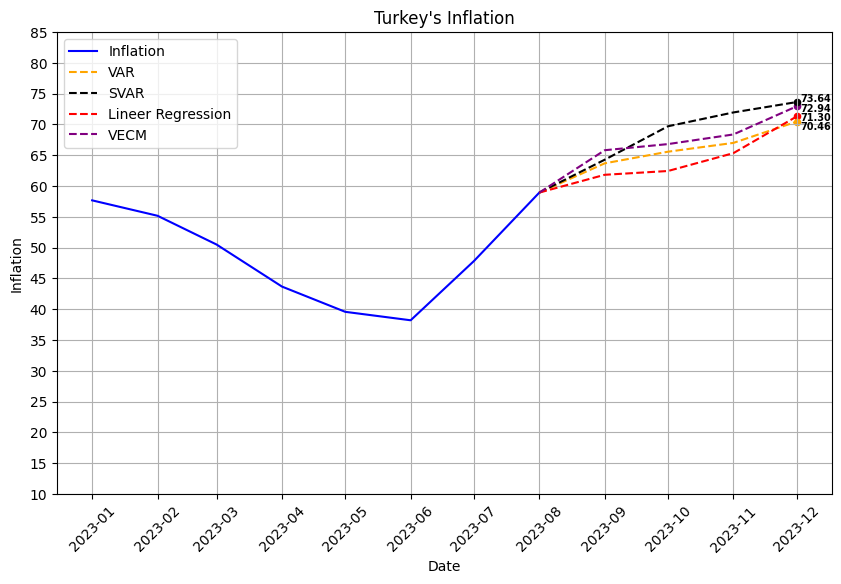

In [157]:
dates=pd.date_range('2008-02-01','2026-02-01' , freq='1M')-pd.offsets.MonthBegin(1)






# Grafik çizdirelim
plt.figure(figsize=(10, 6))
plt.plot(dff.iloc[191:199]["yillik_enflasyon_orani"], label='Inflation', color='blue')
#plt.plot(dfas2.iloc[198:203]["yillik_enflasyon_orani"],'--', label='Forecast with monetary tightening', color='green')
plt.plot(dfas6.iloc[198:203]["yillik_enflasyon_orani"],'--',label='VAR', color='orange'    )
plt.plot(dfas5.iloc[198:203]["yillik_enflasyon_orani"],'--',label='SVAR', color='black')
plt.plot(dff.iloc[198:203]["yillik_enflasyon_orani"],'--',label='Lineer Regression', color='red')
plt.plot(dfas4.iloc[198:203]["yillik_enflasyon_orani"],'--',label='VECM', color='purple')



plt.xlabel('Date')
plt.ylabel('Inflation')
plt.xticks(dff.iloc[191:212].index, dff.iloc[191:212].index.strftime('%Y-%m'), rotation=45)
y_max = int(max(dff["yillik_enflasyon_orani"].iloc[191:212]))
y_min = 10
y_interval = 0.5
y_ticks = [y_min]
while y_ticks[-1] < y_max:
    y_ticks.append(y_ticks[-1] + 5)

son_dort_veri=dff["yillik_enflasyon_orani"].iloc[202:203]
son_dort_veri3=dfas4["yillik_enflasyon_orani"].iloc[202:203]
son_dort_veri4=dfas5["yillik_enflasyon_orani"].iloc[202:203]
son_dort_veri5=dfas6["yillik_enflasyon_orani"].iloc[202:203]
son_dort_veri6=dfas2["yillik_enflasyon_orani"].iloc[202:203]

# Y ekseni etiketlerini ayarlama
for i, v in enumerate(son_dort_veri):
    plt.annotate(f'{v:.2f}', (son_dort_veri.index[i], v), xytext=(3, -3), textcoords='offset points', fontsize=7,
                 color='black', fontweight='bold')
    plt.scatter(son_dort_veri.index,son_dort_veri,color='red',s=20)


for i, v in enumerate(son_dort_veri3):
    plt.annotate(f'{v:.2f}', (son_dort_veri3.index[i], v), xytext=(3, -4), textcoords='offset points', fontsize=7,
                 color='black', fontweight='bold')
    plt.scatter(son_dort_veri3.index,son_dort_veri3,color='purple',s=20)

for i,v in enumerate(son_dort_veri4):
    plt.annotate(f'{v:.2f}', (son_dort_veri4.index[i], v), xytext=(3, 0), textcoords='offset points', fontsize=7,
                 color='black', fontweight='bold')
    plt.scatter(son_dort_veri4.index,son_dort_veri4,color='black',s=20)


for i,v in enumerate(son_dort_veri5):
    plt.annotate(f'{v:.2f}', (son_dort_veri5.index[i], v), xytext=(3, -6), textcoords='offset points', fontsize=7,
                 color='black', fontweight='bold')
    plt.scatter(son_dort_veri5.index,son_dort_veri5,color='orange',s=20)

#for i,v in enumerate(son_dort_veri6):
 #   plt.annotate(f'{v:.2f}', (son_dort_veri5.index[i], v), xytext=(3, -4), textcoords='offset points', fontsize=7,
  #               color='black', fontweight='bold')
   # plt.scatter(son_dort_veri6.index,son_dort_veri6,color='green',s=20)






# Y ekseni etiketlerini ayarlama
plt.yticks(y_ticks)
plt.title("Turkey's Inflation")
plt.legend()
plt.grid(True)
plt.show()
